# GENG5551 Prototype Model Training 

Run code below if using google collab for training. If not skip to next section.

run container with:
sudo docker run --gpus all -it --rm -v $(pwd):/tf/notebooks -p 8888:8888 tensorflow/tensorflow:2.12.0-gpu-jupyter

In [1]:
startup = True

In [2]:
# GB: Useless

# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install akida==2.7.2
# !pip install cnn2snn==2.7.2
# %pip install akida-models==1.5.0
!pip install tensorflow-addons


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
# GB: Same here
# !unzip notebooks/archive

## Dataset Preprocessing

Start here if running on anaconda virtual environment

- This section involves examining and pre-processing the data to make it suitable for use with the Akida models

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os, shutil, random

# os.chdir('notebooks/Documents/GitHub/GENG5551-Akida-Chip')

In [3]:
os.getcwd()

'c:\\Users\\Joo_Kai\\Documents\\GitHub\\GENG5551-Akida-Chip'

In [4]:
# combine the two parts of the dataset into one folder
def combine_folders(source_folders, target_folder):
    os.makedirs(target_folder, exist_ok=True)

    for folder in source_folders:
        file_names = os.listdir(folder)
        for file_name in file_names:
            source_file_path = os.path.join(folder, file_name)
            if os.path.isfile(source_file_path):
                target_file_path = os.path.join(target_folder, file_name)
                shutil.copy(source_file_path, target_file_path)

source_folders = ['archive/HAM10000_images_part_1', 'archive/HAM10000_images_part_2']
target_folder = 'archive/data'
if startup:
    combine_folders(source_folders, target_folder)

In [5]:
# Load the metadata
metadata = pd.read_csv('archive/HAM10000_metadata.csv')

In [6]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
metadata['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [8]:
# There are more rows than unique lesions, so we can assume that there are multiple images for each lesion.
unique_lesion_id = metadata['lesion_id'].unique()
print("Number of rows in metadata:", len(metadata))
print('Number of unique lesions:', len(unique_lesion_id))

Number of rows in metadata: 10015
Number of unique lesions: 7470


In [9]:
# Perform train test split
from sklearn.model_selection import train_test_split
metadata['image_path'] = metadata['image_id'].apply(lambda x: os.path.join(target_folder, f"{x}.jpg"))
train_data, test_data = train_test_split(metadata, random_state=17, stratify=metadata.dx, test_size=0.10)

print(test_data['dx'].value_counts())
print(test_data.shape)

dx
nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: count, dtype: int64
(1002, 8)


In [10]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,archive/data\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,archive/data\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,archive/data\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,archive/data\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,archive/data\ISIC_0031633.jpg


In [11]:
train_data = train_data.set_index("image_id")
test_data = test_data.set_index("image_id")

train_id = list(train_data.index)
test_id = list(test_data.index)

In [12]:
train_dir = os.path.join('archive/data/', "train")
test_dir = os.path.join('archive/data/', "test")


if startup:
    dirs = []

    # Create train and test directory
    dirs.append(train_dir)
    dirs.append(test_dir)

    # Create training subfolders for diagnoses
    train_nv = os.path.join(train_dir, "nv")
    dirs.append(train_nv)
    train_mel = os.path.join(train_dir, "mel")
    dirs.append(train_mel)
    train_bkl = os.path.join(train_dir, "bkl")
    dirs.append(train_bkl)
    train_bcc = os.path.join(train_dir, "bcc")
    dirs.append(train_bcc)
    train_akiec = os.path.join(train_dir, "akiec")
    dirs.append(train_akiec)
    train_vasc = os.path.join(train_dir, "vasc")
    dirs.append(train_vasc)
    train_df = os.path.join(train_dir, "df")
    dirs.append(train_df)

    # Create validation subfolders for diagnoses
    validation_nv = os.path.join(test_dir, "nv")
    dirs.append(validation_nv)
    validation_mel = os.path.join(test_dir, "mel")
    dirs.append(validation_mel)
    validation_bkl = os.path.join(test_dir, "bkl")
    dirs.append(validation_bkl)
    validation_bcc = os.path.join(test_dir, "bcc")
    dirs.append(validation_bcc)
    validation_akiec = os.path.join(test_dir, "akiec")
    dirs.append(validation_akiec)
    validation_vasc = os.path.join(test_dir, "vasc")
    dirs.append(validation_vasc)
    validation_df = os.path.join(test_dir, "df")
    dirs.append(validation_df)

    for directory in dirs:
        if not os.path.exists(directory):
            os.mkdir(directory)

In [13]:
if startup:    
# move images to train and test dirs
    target_folder = 'archive/data'
    files = os.listdir(target_folder)

    for image in train_id:
        file_name = str(image + '.jpg')
        label = train_data.loc[image,'dx']

        if file_name in files:
            src = os.path.join(target_folder, file_name)
            dst = os.path.join(train_dir, label, file_name)
            shutil.copyfile(src, dst)

    for image in test_id:

        file_name = image + '.jpg'
        label = test_data.loc[image,'dx']

        if file_name in files:
            src = os.path.join(target_folder, file_name)
            dst = os.path.join(test_dir, label, file_name)
            shutil.copyfile(src, dst)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if startup:
    # Perform data augmentation
    class_names = ["df", "mel","bkl", "bcc", "akiec", "vasc", "nv"]

    for d in class_names:
        source_dir = 'archive/data/'
        
        aug_dir = os.path.join(source_dir,'aug_dir') 
        if not os.path.exists(aug_dir):
            os.mkdir(aug_dir)
        
        img_dir = os.path.join(aug_dir, d)
        if not os.path.exists(img_dir):
            os.mkdir(img_dir)

        img_class = d

        img_list = os.listdir(source_dir + 'train/' + img_class)
        
        for i in img_list: 
            src = os.path.join(source_dir + 'train/' + img_class, i)
            dst = os.path.join(img_dir,i)
            shutil.copyfile(src, dst)


        path = aug_dir
        save_path = img_dir
        
        datagen = ImageDataGenerator(
            rotation_range=90,
            featurewise_center=True,
            featurewise_std_normalization=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=[0.8,1.0],
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=(0.8,1.2),
            fill_mode='reflect')
        
        batch_size = 50
        
        aug_datagen = datagen.flow_from_directory(path,
                                            save_to_dir=save_path,
                                            save_format='jpeg',
                                                save_prefix='',
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=batch_size, shuffle=False) #important Set Shuffle=False!
        
    
        
        num_wanted = 6000
        
        num_files = len(os.listdir(img_dir))
        num_batches = int(np.ceil((num_wanted-num_files)/batch_size))


        for i in range(0,num_batches):

            imgs, labels = next(aug_datagen)
        
        img_list = sorted(img_list)
        aug_list = os.listdir(img_dir)

        for number,image in enumerate(img_list):
            for filename in aug_list:
                if f"_{number}_" in filename:
                    filename_new = image[5:12] + filename
                    os.rename(os.path.join(img_dir,filename), os.path.join(img_dir,filename_new))

        for augfile in os.listdir(img_dir):
            if augfile not in img_list:
                shutil.move(img_dir + '/' + augfile, source_dir + 'train/' + img_class + '/' + augfile)

        
        shutil.rmtree(aug_dir)

Found 103 images belonging to 1 classes.


c:\Users\Joo_Kai\anaconda3\envs\akida\Lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\Joo_Kai\anaconda3\envs\akida\Lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Found 1002 images belonging to 1 classes.
Found 989 images belonging to 1 classes.
Found 463 images belonging to 1 classes.
Found 294 images belonging to 1 classes.
Found 128 images belonging to 1 classes.
Found 6034 images belonging to 1 classes.


In [17]:
# scale images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=50.0
)

# train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='sparse',
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='sparse'
)

Found 38704 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


## Model Training

In [18]:
# GB: Change Akida version
import os
import cnn2snn
import akida as ak

# Change Akida version
os.environ["CNN2SNN_TARGET_AKIDA_VERSION"] = "v1"

# Double-check Avida version
print(' Akida version: ', cnn2snn.get_akida_version())

 Akida version:  AkidaVersion.v1


2024-10-01 07:02:53.281214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 07:02:53.284905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 07:02:53.285023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:
from akida_models import fetch_file, akidanet_imagenet, mobilenet_imagenet

# GB: Things have to be changed here. It shouldn't work with weights coming from v2 but it does.
# I thought there were a ready to use model: akidanet_imagenet_pretrained()
# In fact, yes, there is: https://doc.brainchipinc.com/api_reference/akida_models_apis.html#akida_models.akidanet_imagenet_pretrained
# With 0.5 and False, it should give the expected model.
# TO BE CHECKED
#base_model = akidanet_imagenet_trained(alpha=0.5, quantized=False)

IMG_SIZE = 224
# CLASSES = metadata['dx'].unique()
CLASSES = 7


# Create a base model without top layers
base_model = akidanet_imagenet(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                               classes=CLASSES,
                               alpha=1.0,
                               include_top=False,
                               pooling='avg')

pretrained_weights = 'pretrained_weights/akidanet_imagenet_224.h5'

base_model.load_weights(pretrained_weights, by_name=True)
base_model.summary()

Model: "akidanet_1.00_224_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv_0 (Conv2D)             (None, 112, 112, 32)      864       
                                                                 
 conv_0/BN (BatchNormalizati  (None, 112, 112, 32)     128       
 on)                                                             
                                                                 
 conv_0/relu (ReLU)          (None, 112, 112, 32)      0         
                                                                 
 conv_1 (Conv2D)             (None, 112, 112, 64)      18432     
                                               

In [20]:
from keras import Model
from keras.layers import Activation, Dropout, Reshape
from akida_models.layer_blocks import dense_block

x = base_model.output
x = dense_block(x,
                units=512,
                name='fc1',
                add_batchnorm=True,
                # GB: Changed to ReLU 6
                #relu_activation='ReLU7.5')
                relu_activation='ReLU6')
x = Dropout(0.5, name='dropout_1')(x)
x = dense_block(x,
                units=CLASSES,
                name='predictions',
                add_batchnorm=False,
                relu_activation=False)


x = Reshape((CLASSES,), name='reshape1')(x)

# Build the model
model_keras = Model(base_model.input, x, name='akidanet_derma')

model_keras.summary()

Model: "akidanet_derma"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv_0 (Conv2D)             (None, 112, 112, 32)      864       
                                                                 
 conv_0/BN (BatchNormalizati  (None, 112, 112, 32)     128       
 on)                                                             
                                                                 
 conv_0/relu (ReLU)          (None, 112, 112, 32)      0         
                                                                 
 conv_1 (Conv2D)             (None, 112, 112, 64)      18432     
                                                    

In [21]:
# GB: Adding compatibility check
import cnn2snn
import akida as ak

# Double-check Akida version
print('Akida version: ', cnn2snn.get_akida_version())

# And HW compatibility?
# myDevice = ak.devices()[1]
# print("Device: ", myDevice.desc)
# x = cnn2snn.check_model_compatibility(model=model_keras, device=myDevice)
# print("Non compatibilities: ", x)

Akida version:  AkidaVersion.v1


/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/10


2024-10-01 07:02:54.690299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-01 07:02:56.827349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-10-01 07:02:57.558031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


388/388 [==============================] - ETA: 0s - loss: 7.0735 - accuracy: 0.2262

2024-10-01 07:06:05.853924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


388/388 [==============================] - 194s 490ms/step - loss: 7.0735 - accuracy: 0.2262 - val_loss: 2.8584 - val_accuracy: 0.6647
Epoch 2/10
388/388 [==============================] - 193s 498ms/step - loss: 3.0084 - accuracy: 0.3619 - val_loss: 2.5883 - val_accuracy: 0.6637
Epoch 3/10
388/388 [==============================] - 194s 499ms/step - loss: 2.5750 - accuracy: 0.3486 - val_loss: 2.6453 - val_accuracy: 0.2246
Epoch 4/10
388/388 [==============================] - 194s 500ms/step - loss: 2.4733 - accuracy: 0.2499 - val_loss: 1.9687 - val_accuracy: 0.3224
Epoch 5/10
388/388 [==============================] - 193s 497ms/step - loss: 2.2251 - accuracy: 0.2442 - val_loss: 1.8929 - val_accuracy: 0.3014
Epoch 6/10
388/388 [==============================] - 192s 496ms/step - loss: 2.1624 - accuracy: 0.2395 - val_loss: 2.0559 - val_accuracy: 0.2495
Epoch 7/10
388/388 [==============================] - 193s 498ms/step - loss: 2.0998 - accuracy: 0.2619 - val_loss: 1.9623 - val_accura

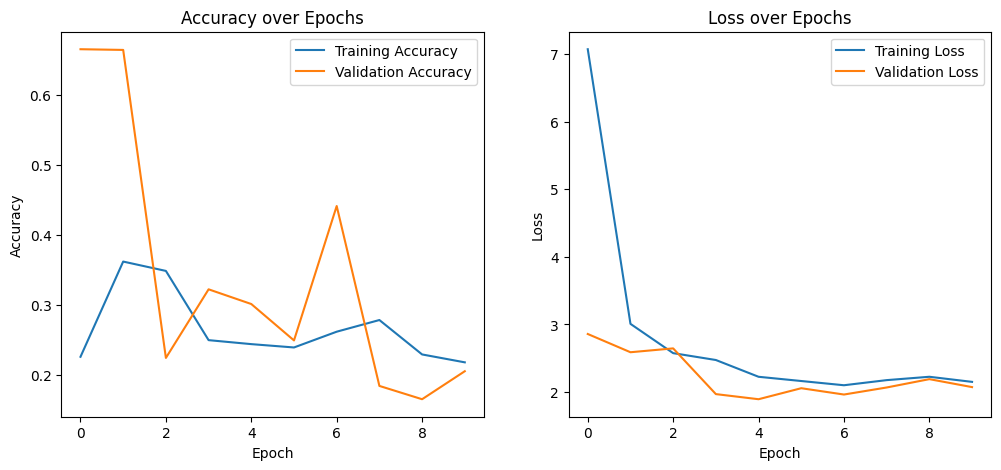

In [22]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa

# Setting up the learning rate schedule
initial_learning_rate = 1e-3
final_learning_rate = 1e-5
decay_steps = 10
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate=(final_learning_rate / initial_learning_rate) ** (1 / decay_steps),
    staircase=True)

# Configuring the optimizer
# optimizer = RAdam(learning_rate=lr_schedule)

# optimizer = RMSprop(
#     learning_rate=1e-3,
#     rho=0.9,
#     momentum=0.0,
#     epsilon=1e-7
# )

# optimizer = AdamW(learning_rate = lr_schedule, weight_decay=0.1)

optimizer = tfa.optimizers.RectifiedAdam(
    learning_rate=1e-3,  # Start with your current learning rate
    total_steps=10000,  # Total number of training steps
    warmup_proportion=0.1,  # 10% of the steps are used for learning rate warmup
    min_lr=1e-5,  # The minimum learning rate after decay
    weight_decay=0.01
)

# Compiling the model
model_keras.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

# Setting up callbacks for saving the model and early stopping
checkpoint_cb = ModelCheckpoint(
    'akidanet_derma_best.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(
    patience=5, restore_best_weights=True)

# GB: To change nb of epochs 
# (on CPU, 1 epoch lasts 22 min, so 10 is 4 hours long)
EPOCHS = 10 # Initial value: 10

# Training the model
history = model_keras.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=test_gen,
    callbacks=[checkpoint_cb, early_stopping_cb])


# Optionally, plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2024-10-01 07:35:02.879722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


388/388 [==============================] - 191s 491ms/step


2024-10-01 07:38:13.907016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 3s 233ms/step


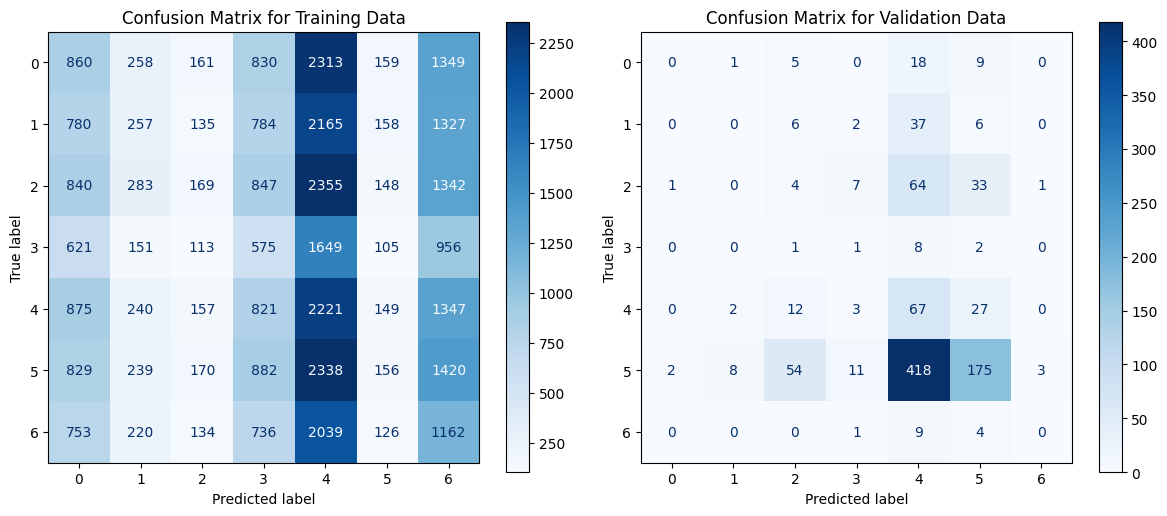

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain predictions for the training and validation datasets
train_predictions = np.argmax(model_keras.predict(train_gen), axis=-1)
val_predictions = np.argmax(model_keras.predict(test_gen), axis=-1)

# Get true labels from the generators
train_labels = train_gen.classes
val_labels = test_gen.classes

# Compute confusion matrices
train_cm = confusion_matrix(train_labels, train_predictions)
val_cm = confusion_matrix(val_labels, val_predictions)

# Plot confusion matrix for training data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=train_cm).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Training Data')

# Plot confusion matrix for validation data
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix=val_cm).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Validation Data')

plt.tight_layout()
plt.show()

In [24]:
# Function to convert generator to tf.data.Dataset
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Create a Dataset from the generator
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_gen,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

train_dataset = train_dataset.map(format_example, num_parallel_calls=tf.data.AUTOTUNE)

# Define batch size and batch the dataset
BATCH_SIZE = 16
train_batches = train_dataset.unbatch().batch(BATCH_SIZE)

## Quantize Model

In [25]:
from quantizeml.models import quantize, QuantizationParams, dump_config

# Prepare a quantization scheme: first layer weights to 8-bit, other weights and activation to 4-bit

# GB: Parameter per_tensor_activation = False, really? fot v1 models, you need to set this parameter to True, by default, it's False-> quantizeml.models.quantize(..., per_tensor_activations=False)
#qparams = QuantizationParams(input_weight_bits=8, weight_bits=4, activation_bits=4)
qparams = QuantizationParams(input_weight_bits=8, per_tensor_activations=True, weight_bits=4, activation_bits=4)

# Quantize the model, using the 1024 calibration samples from the train set and calibrate over 2
# epochs with a batch_size of 100.
model_quantized = quantize(model_keras, qparams=qparams, 
                           samples=train_batches, epochs=2, batch_size=BATCH_SIZE, num_samples=1024)


2024-10-01 07:38:24.406989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - 6s 79ms/step


In [26]:
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_gen,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

test_dataset = test_dataset.map(format_example, num_parallel_calls=tf.data.AUTOTUNE)

# Define batch size and batch the dataset
BATCH_SIZE = 32
test_batches = test_dataset.unbatch().batch(BATCH_SIZE)

In [27]:
import numpy as np

def generator_to_numpy(generator):
    images_list = []
    labels_list = []

    # Iterate through the generator
    for _ in range(len(generator)):
        images, labels = generator.next()
        images_list.append(images)
        labels_list.append(labels)

    # Concatenate lists into numpy arrays
    x_test = np.concatenate(images_list, axis=0)
    labels_test = np.concatenate(labels_list, axis=0)

    return x_test, labels_test

# Example usage with test_gen
x_test, labels_test = generator_to_numpy(test_gen)

# Ensure the shapes are correct
print(x_test.shape)  # Should be (num_samples, 224, 224, 3)
print(labels_test.shape)  # Should be (num_samples,)


(1002, 224, 224, 3)
(1002,)


2024-10-01 07:38:41.738722: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: akidanet_derma/conv_0/aligned_weight_quantizer/assert_less/Assert/AssertGuard/branch_executed/_25


11/11 [==============================] - 4s 94ms/step
Keras inference on 1002 images took 4.09 s.

Keras accuracy: 292/1002.


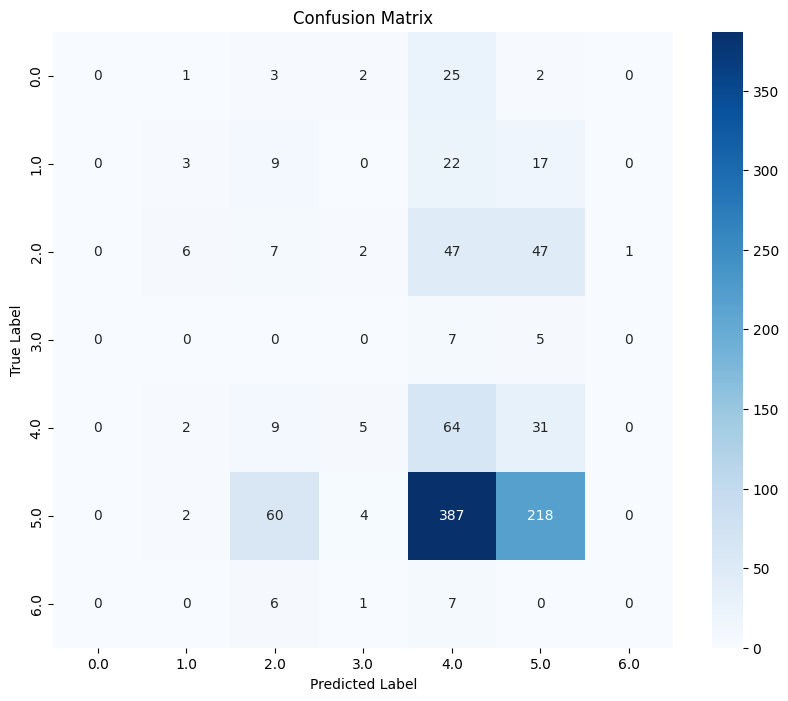

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from timeit import default_timer as timer

# Compile the model with the specified metric
model_quantized.compile(metrics=['accuracy'])

# Get the number of images in the test dataset
num_images = len(x_test)

# Measure the time taken for Keras inference
start = timer()
potentials_keras = model_quantized.predict(x_test, batch_size=100)
end = timer()
print(f'Keras inference on {num_images} images took {end-start:.2f} s.\n')

# Get the predicted labels from the model output
preds_keras = np.squeeze(np.argmax(potentials_keras, 1))

# Calculate the accuracy
accuracy_keras = np.sum(np.equal(preds_keras, labels_test)) / num_images
print(f"Keras accuracy: {accuracy_keras*num_images:.0f}/{num_images}.")

# Generate the confusion matrix
cm = confusion_matrix(labels_test, preds_keras)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_test), yticklabels=np.unique(labels_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# GB: Adding Keras Floating-point accuracy to compare with previous one

model_keras.compile(metrics=['accuracy'])

num_images = len(x_test)

start = timer()
potentials_keras = model_keras.predict(x_test, batch_size=100)
end = timer()
print(f'Keras inference on {num_images} images took {end-start:.2f} s.\n')

preds_keras = np.squeeze(np.argmax(potentials_keras, 1))
accuracy_keras = np.sum(np.equal(preds_keras, labels_test)) / num_images
print(f"Keras accuracy: {accuracy_keras*num_images:.0f}/{num_images}.")

11/11 [==============================] - 0s 23ms/step
Keras inference on 1002 images took 0.62 s.

Keras accuracy: 302/1002.


In [30]:
# GB: Name changed
model_quantized.save('model_quantized_v1.h5')

In [31]:
import numpy as np
from cnn2snn import convert

model_akida = convert(model_quantized)


/usr/local/lib/python3.8/dist-packages/cnn2snn/transforms/act_step_equalization.py:89: UserWarning: Warning: The separable_10 layer holds very high threshold                           values which are not compatible with the hardware. Those are clipped                           to the maximum supported value 524287.
  warnings.warn(f"Warning: The {layer.name} layer holds very high threshold \
/usr/local/lib/python3.8/dist-packages/cnn2snn/transforms/act_step_equalization.py:89: UserWarning: Warning: The separable_11 layer holds very high threshold                           values which are not compatible with the hardware. Those are clipped                           to the maximum supported value 524287.
  warnings.warn(f"Warning: The {layer.name} layer holds very high threshold \


In [32]:
model_akida.summary()

                 Model Summary                  
________________________________________________
Input shape    Output shape  Sequences  Layers
[224, 224, 3]  [1, 1, 7]     1          16    
________________________________________________

______________________________________________________________
Layer (type)              Output shape    Kernel shape      

============== SW/conv_0-predictions (Software) ==============

conv_0 (InputConv.)       [112, 112, 32]  (3, 3, 3, 32)     
______________________________________________________________
conv_1 (Conv.)            [112, 112, 64]  (3, 3, 32, 64)    
______________________________________________________________
conv_2 (Conv.)            [56, 56, 128]   (3, 3, 64, 128)   
______________________________________________________________
conv_3 (Conv.)            [56, 56, 128]   (3, 3, 128, 128)  
______________________________________________________________
separable_4 (Sep.Conv.)   [28, 28, 256]   (3, 3, 128, 1)    
____________

In [33]:
# GB: I do not understand this block, I guess you skip it in normal flow, or you start here ...

# from tensorflow.keras.models import load_model
# from akida_models import load_model

# model_path = 'model_akida_v1.fbz'
# model_akida = load_model(model_path)

# model_akida.summary()

In [34]:
# GB: Change model name to v1
model_akida.save('model_akida_v1.fbz')

In [35]:
# GB: Get device (again)
# myDevice = ak.devices()[1]
# print('Device: ', myDevice.desc)
# model_akida.map(myDevice)
# model_akida.summary()

In [36]:
# Check Model performance
start = timer()
accuracy_akida = model_akida.evaluate(x_test, labels_test)
end = timer()
print(f'Inference on {num_images} images took {end-start:.2f} s.\n')
print(f"Accuracy: {accuracy_akida*num_images:.0f}/{num_images}.")

Inference on 1002 images took 9.73 s.

Accuracy: 289/1002.


In [37]:
import numpy as np


# Get the class indices for each sample
class_indices = test_gen.classes

# Get the mapping from class names to indices
class_indices_mapping = test_gen.class_indices

# Create a reverse mapping from indices to class names
index_to_class = {v: k for k, v in class_indices_mapping.items()}

# Count the number of samples for each class
class_counts = np.bincount(class_indices)

# Print the number of samples for each class
print("Number of samples:", test_gen.samples)
print("Number of samples per class in the test generator:")
for class_index, count in enumerate(class_counts):
    class_name = index_to_class[class_index]
    print(f"{class_name}: {count}")


Number of samples: 1002
Number of samples per class in the test generator:
akiec: 33
bcc: 51
bkl: 110
df: 12
mel: 111
nv: 671
vasc: 14


IndexError: list index out of range

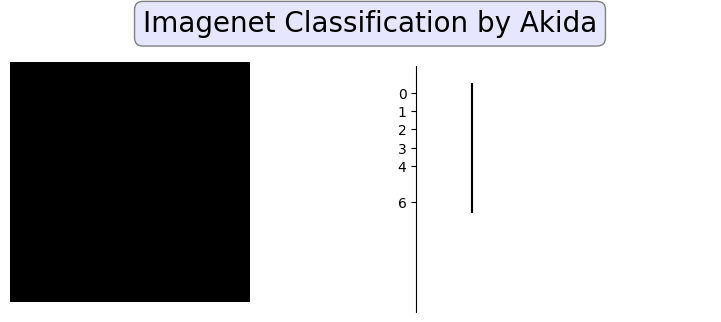

In [38]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from akida_models.imagenet import preprocessing

class_names = ['Cancerous', 'Benign']

IMAGE_SIZE = 224
NUM_CHANNELS = 3

# Functions used to display the top5 results
def get_top5(potentials, true_label):
    """
    Returns the top 5 classes from the output potentials
    """
    tmp_pots = potentials.copy()
    top5 = []
    min_val = np.min(tmp_pots)
    for ii in range(5):
        best = np.argmax(tmp_pots)
        top5.append(best)
        tmp_pots[best] = min_val

    vals = np.zeros((6,))
    vals[:5] = potentials[top5]

    if true_label not in top5:
        vals[5] = potentials[true_label]
    else:
        vals[5] = 0

    vals /= np.max(vals)

    class_name = []
    for ii in range(5):
        class_name.append(class_names[top5[ii]])
    if true_label in top5:
        class_name.append('')
    else:
        class_name.append(
            class_names[true_label])

    return top5, vals, class_name


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine
    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])


def prepare_plots():
    fig = plt.figure(figsize=(8, 4))
    # Image subplot
    ax0 = plt.subplot(1, 3, 1)
    imgobj = ax0.imshow(np.zeros((IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS), dtype=np.uint8))
    ax0.set_axis_off()
    # Top 5 results subplot
    ax1 = plt.subplot(1, 2, 2)
    bar_positions = (0, 1, 2, 3, 4, 6)
    rects = ax1.barh(bar_positions, np.zeros((6,)), align='center', height=0.5)
    plt.xlim(-0.2, 1.01)
    ax1.set(xlim=(-0.2, 1.15), ylim=(-1.5, 12))
    ax1.set_yticks(bar_positions)
    ax1.invert_yaxis()
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks([])
    adjust_spines(ax1, 'left')
    ax1.add_line(lines.Line2D((0, 0), (-0.5, 6.5), color=(0.0, 0.0, 0.0)))
    # Adjust Plot Positions
    ax0.set_position([0.05, 0.055, 0.3, 0.9])
    l1, b1, w1, h1 = ax1.get_position().bounds
    ax1.set_position([l1 * 1.05, b1 + 0.09 * h1, w1, 0.8 * h1])
    # Add title box
    plt.figtext(0.5,
                0.9,
                "Imagenet Classification by Akida",
                size=20,
                ha="center",
                va="center",
                bbox=dict(boxstyle="round",
                          ec=(0.5, 0.5, 0.5),
                          fc=(0.9, 0.9, 1.0)))

    return fig, imgobj, ax1, rects


def update_bars_chart(rects, vals, true_label):
    counter = 0
    for rect, h in zip(rects, yvals):
        rect.set_width(h)
        if counter < 5:
            if top5[counter] == true_label:
                if counter == 0:
                    rect.set_facecolor((0.0, 1.0, 0.0))
                else:
                    rect.set_facecolor((0.0, 0.5, 0.0))
            else:
                rect.set_facecolor('gray')
        elif counter == 5:
            rect.set_facecolor('red')
        counter += 1


# Prepare plots
fig, imgobj, ax1, rects = prepare_plots()

# Get a random image
img = np.random.randint(num_images)

# Predict image class
outputs_akida = model_akida.predict(np.expand_dims(x_test[img].astype(np.uint8), axis=0)).squeeze()

# Get top 5 prediction labels and associated names
true_label = labels_test[img]

# GB: Added, because of last layer activation function
true_label = int(true_label)

top5, yvals, class_name = get_top5(outputs_akida, true_label)
print(top5)
print(yvals)
print(class_name)

print("Akida outputs:", outputs_akida)
print("True label:", class_names[int(true_label)])
print("Predicted label:", class_names[np.argmax(outputs_akida)])

# Draw Plots
imgobj.set_data(x_test[img])
ax1.set_yticklabels(class_name, rotation='horizontal', size=9)
update_bars_chart(rects, yvals, true_label)
fig.canvas.draw()
plt.show()